<a href="https://colab.research.google.com/github/hananedjellouadji/DataVis/blob/main/cp_ml_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sns

In [ ]:
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
ne=len(df['waterfront'])
print("nbr elements:",ne)
print(df["waterfront"].value_counts())
#barely no waterfronts
ne=len(df['yr_renovated'])
print("nbr elements:",ne)
print(df["yr_renovated"].value_counts())
#majority not renovated

nbr elements: 21613
0    21450
1      163
Name: waterfront, dtype: int64
nbr elements: 21613
0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


In [ ]:
df=pd.read_csv('kc_house_data.csv')
df['nbr_rooms']=df['bedrooms']+df['bathrooms']+df['floors']
df['sum_sqft']=df['sqft_living']+df['sqft_lot']+df['sqft_above']+df['sqft_basement']+df['sqft_living15']+df['sqft_lot15']
df.drop(["bedrooms","bathrooms","floors","date","sqft_basement","sqft_above","sqft_lot","sqft_living","sqft_lot15","sqft_living15","yr_renovated","waterfront","lat","long","zipcode"],axis=1,inplace=True)
df

,id,price,view,condition,grade,yr_built,nbr_rooms,sum_sqft
0,7129300520,221900.0,0,3,7,1955,5.00,15000
1,6414100192,538000.0,0,3,7,1951,7.25,21711
2,5631500400,180000.0,0,3,6,1933,4.00,22322
3,2487200875,604000.0,0,5,7,1965,8.00,15280
4,1954400510,510000.0,0,3,8,1987,6.00,20743
...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,0,3,8,2009,8.50,7230
21609,6600060120,400000.0,0,3,8,2014,8.50,19463
21610,1523300141,402101.0,0,3,7,2009,4.75,6417
21611,291310100,400000.0,0,3,8,2004,7.50,8285


In [ ]:
#most important features : price, grade, condition, sum_sqft, yr_built, nbr_rooms,view

In [ ]:
#splitting & applying linear regression
x=df['grade'].values[:,np.newaxis]
y=df['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

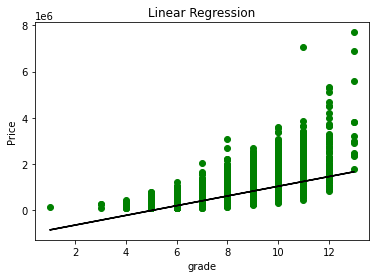

In [ ]:
#plotting linear regression
plt.scatter(x,y,color='g') 
plt.ylabel('Price')
plt.xlabel('grade')
plt.title('Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show()

In [ ]:
#measuring performance
print("MSE",mean_squared_error(y_test,predicted))
print("R^2",metrics.r2_score(y_test,predicted))
#approximatively half of the price's variation can be explained by the grades

MSE 69844149619.10716
R^2 0.45670315148561336


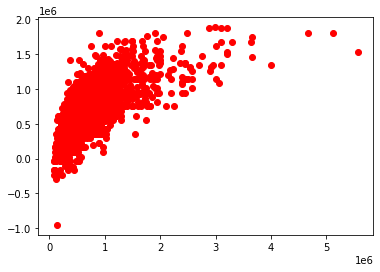

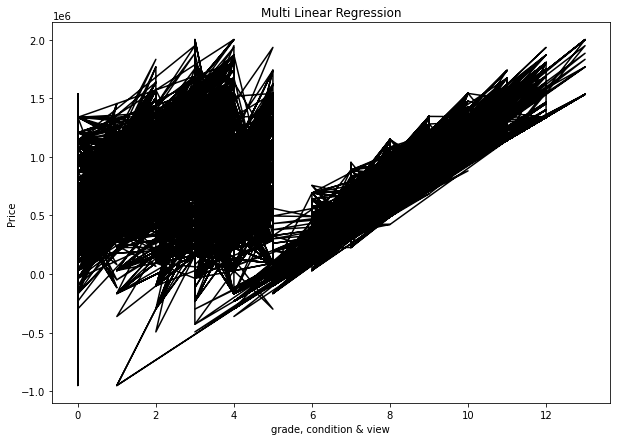

In [ ]:
#multi linear regression
x=df.drop(['id','price','sum_sqft','yr_built','nbr_rooms'],axis=1).values
y=df['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('Price')
plt.xlabel('grade, condition & view ')
plt.title('Multi Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show()
#the data is concentrated in the small values and we can see that in general there's a proportionality between the price and the three features

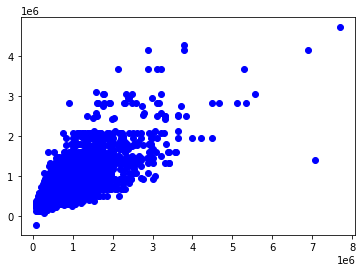

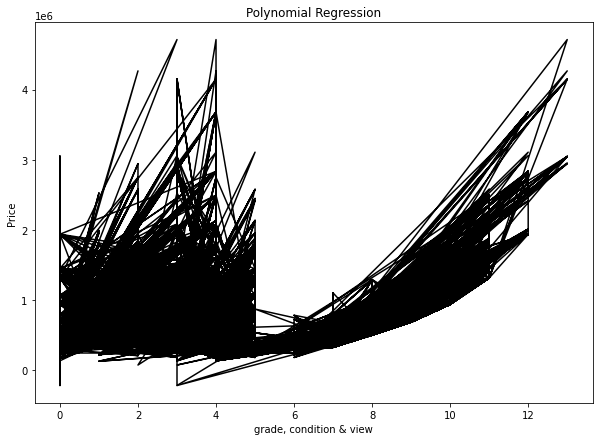

In [ ]:
#polynomial Regression
x=df.drop(['id','price','sum_sqft','yr_built','nbr_rooms'],axis=1).values
y=df['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lg=LinearRegression()
lg.fit(x_poly,y)
predicted=lg.predict(x_poly)
plt.scatter(y,predicted,color='b') 
plt.figure(figsize=(10,7))
plt.ylabel('Price')
plt.xlabel('grade, condition & view')
plt.title('Polynomial Regression')
plt.plot(x,predicted, color='k')
plt.show()